In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.applications import DenseNet169
from keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train_validation = np.load('../data/X_train_validation.npy')
y_train_validation = np.load('../data/y_train_validation.npy')

X_test = np.load('../data/X_test.npy')
y_test = np.load('../data/y_test.npy')

X_train = np.load('../data/X_train.npy')
y_train = np.load('../data/y_train.npy')

X_validation = np.load('../data/X_validation.npy')
y_validation = np.load('../data/y_validation.npy')

In [ ]:
data = pd.read_csv('../data/all_data.csv')

In [ ]:
data.drop(columns = ['Unnamed: 0'], inplace = True)
data.dropna(inplace = True)
data

,index,title,genre,poster,movieID,Romance,Sci-Fi,Comedy,Horror,Thriller,Drama,Action
0,69,The Life and Death of King Richard III,['Drama'],https://m.media-amazon.com/images/M/MV5BMTQ1OD...,69.0,0,0,0,0,0,1,0
1,74,Ingeborg Holm,['Drama'],https://m.media-amazon.com/images/M/MV5BMTI5Mj...,74.0,0,0,0,0,0,1,0
2,85,Fantomas Against Fantomas,['Drama'],https://m.media-amazon.com/images/M/MV5BMTQxND...,85.0,0,0,0,0,0,1,0
3,91,Hypocrites,['Drama'],https://m.media-amazon.com/images/M/MV5BMjA5NT...,91.0,0,0,0,0,0,1,0
4,93,Judith of Bethulia,['Drama'],https://m.media-amazon.com/images/M/MV5BMjA3Nj...,93.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12768,45813,The Bride He Bought Online,['Thriller'],https://m.media-amazon.com/images/M/MV5BMjMwOT...,45813.0,0,0,0,0,1,0,0
12769,45831,Chris Tucker Live,['Comedy'],https://m.media-amazon.com/images/M/MV5BMTU1Mz...,45831.0,0,0,1,0,0,0,0
12770,45888,Scenes of a Sexual Nature,"['Comedy', 'Drama', 'Romance']",https://m.media-amazon.com/images/M/MV5BMTA5OT...,45888.0,1,0,1,0,0,1,0
12771,45910,Arianna,['Drama'],https://m.media-amazon.com/images/M/MV5BMTA1ND...,45910.0,0,0,0,0,0,1,0


In [ ]:
genres = data.columns[5:]
genres

Index(['Romance', 'Sci-Fi', 'Comedy', 'Horror', 'Thriller', 'Drama', 'Action'], dtype='object')

In [ ]:
input_shape = (80, 80, 3)
num_classes = genres.shape[0]

The model of the network we will use is a CNN containing the pre-trained model DenseNet-169 from the Keras library as the base model, the GlobalAveragePooling2D layer and three fully connected layers: the first with 1024, the second with 128, and the third with the number of genres neurons. In the base model, we will train every fourth layer. Because of the multilabel classification problem in the last layer, we use the sigmoid as the activation function to obtain the probabilities of belonging to each genre (class). We use the Adam optimizer. In this case, the learning rate is 0.0001. Also, we use the binary crossentropy as a loss function since we solve a binary classification problem for each genre - whether the movie belongs to that genre or not.

In [ ]:
base_model = DenseNet169(weights = 'imagenet',
                         include_top = False,
                         input_shape = input_shape)

i = 0
for layer in base_model.layers:
  if i % 4 != 0:
    layer.trainable = False
  i += 1

model_1 = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024, activation = 'relu'),
  Dense(128, activation = 'relu'),
  Dense(num_classes, activation = 'sigmoid')
])

model_1.compile(optimizer = Adam(learning_rate = 0.0001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 2, 2, 1664)        12642880  
                                                                 
 global_average_pooling2d (  (None, 1664)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1704960   
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 7)                 903       
                                                                 
Total params: 14479943 (55.24 MB)
Trainable params: 4855815 (18.52 MB)
Non-trainable params: 9624128 (36.71 MB)
__________

The number of epochs is 15 and the batch size is 32 throughout the training process. I have tried to train with different batch sizes and epochs, but this does not lead to any particular result.

In [ ]:
history = model_1.fit(X_train,
                      y_train,
                      epochs = 15,
                      validation_data = (X_validation, y_validation),
                      batch_size = 32)

Epoch 1/15
256/256 [==============================] - 79s 124ms/step - loss: 0.4499 - accuracy: 0.3262 - val_loss: 0.4489 - val_accuracy: 0.3400
Epoch 2/15
256/256 [==============================] - 33s 130ms/step - loss: 0.4076 - accuracy: 0.3734 - val_loss: 0.4469 - val_accuracy: 0.3596
Epoch 3/15
256/256 [==============================] - 28s 109ms/step - loss: 0.3783 - accuracy: 0.3982 - val_loss: 0.4379 - val_accuracy: 0.3562
Epoch 4/15
256/256 [==============================] - 27s 105ms/step - loss: 0.3453 - accuracy: 0.4262 - val_loss: 0.4341 - val_accuracy: 0.3806
Epoch 5/15
256/256 [==============================] - 26s 101ms/step - loss: 0.3103 - accuracy: 0.4673 - val_loss: 0.4425 - val_accuracy: 0.3586
Epoch 6/15
256/256 [==============================] - 27s 107ms/step - loss: 0.2662 - accuracy: 0.5011 - val_loss: 0.4892 - val_accuracy: 0.3552
Epoch 7/15
256/256 [==============================] - 34s 134ms/step - loss: 0.2200 - accuracy: 0.5366 - val_loss: 0.5266 - val_ac

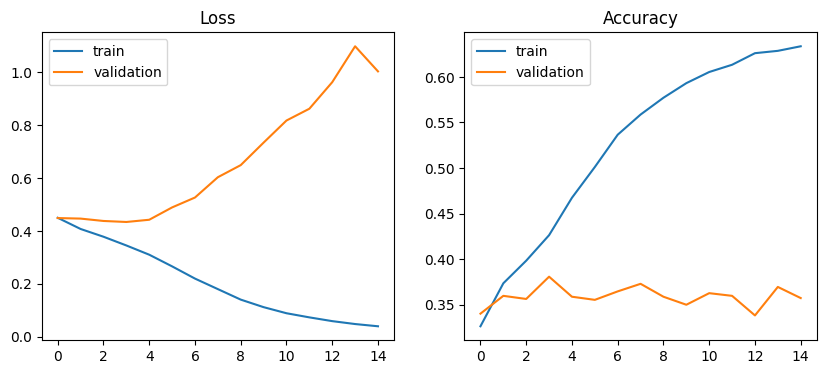

In [ ]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(np.arange(15), history.history['loss'], label = 'train')
plt.plot(np.arange(15), history.history['val_loss'], label = 'validation')
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(np.arange(15), history.history['accuracy'], label = 'train')
plt.plot(np.arange(15), history.history['val_accuracy'], label = 'validation')
plt.legend()

plt.show()

In [ ]:
model_path = '../models/model_densenet_1.h5'
model_1.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


From the previous plot we can see that there is overfitting and to prevent this we will use regularization - we will add 4 Dropout layers with a parameter of 0.5.

In [ ]:
base_model = DenseNet169(weights = 'imagenet',
                         include_top = False,
                         input_shape = input_shape)

i = 0
for layer in base_model.layers:
  if i % 4 != 0:
    layer.trainable = False
  i += 1

model_2 = Sequential([
  base_model,
  Dropout(0.5),
  GlobalAveragePooling2D(),
  Dropout(0.5),
  Dense(1024, activation = 'relu'),
  Dropout(0.5),
  Dense(128, activation = 'relu'),
  Dropout(0.5),
  Dense(num_classes, activation = 'sigmoid')
])

model_2.compile(optimizer = Adam(learning_rate = 0.0001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 2, 2, 1664)        12642880  
                                                                 
 dropout (Dropout)           (None, 2, 2, 1664)        0         
                                                                 
 global_average_pooling2d_1  (None, 1664)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1664)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1704960   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                      

In [ ]:
history = model_2.fit(X_train,
                      y_train,
                      epochs = 15,
                      validation_data = (X_validation, y_validation),
                      batch_size = 32)

Epoch 1/15
256/256 [==============================] - 56s 92ms/step - loss: 0.5715 - accuracy: 0.2444 - val_loss: 0.4861 - val_accuracy: 0.2539
Epoch 2/15
256/256 [==============================] - 21s 82ms/step - loss: 0.5073 - accuracy: 0.2636 - val_loss: 0.4622 - val_accuracy: 0.2784
Epoch 3/15
256/256 [==============================] - 21s 82ms/step - loss: 0.4883 - accuracy: 0.2811 - val_loss: 0.4532 - val_accuracy: 0.3028
Epoch 4/15
256/256 [==============================] - 21s 84ms/step - loss: 0.4741 - accuracy: 0.3017 - val_loss: 0.4584 - val_accuracy: 0.3381
Epoch 5/15
256/256 [==============================] - 21s 81ms/step - loss: 0.4598 - accuracy: 0.3203 - val_loss: 0.4462 - val_accuracy: 0.3586
Epoch 6/15
256/256 [==============================] - 20s 79ms/step - loss: 0.4456 - accuracy: 0.3412 - val_loss: 0.4347 - val_accuracy: 0.3498
Epoch 7/15
256/256 [==============================] - 21s 80ms/step - loss: 0.4366 - accuracy: 0.3554 - val_loss: 0.4402 - val_accuracy:

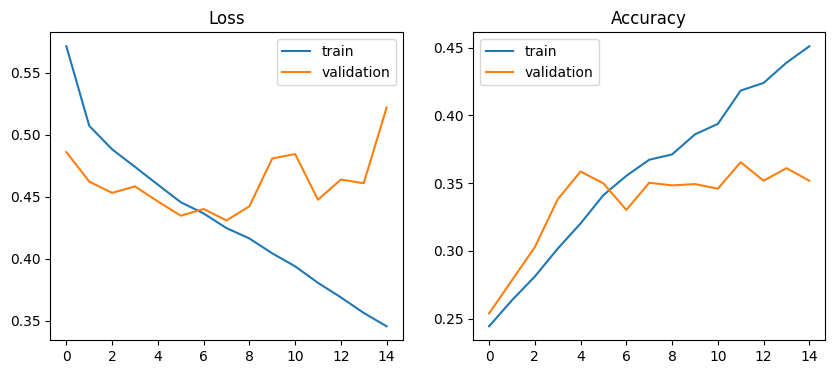

In [ ]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(np.arange(15), history.history['loss'], label = 'train')
plt.plot(np.arange(15), history.history['val_loss'], label = 'validation')
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(np.arange(15), history.history['accuracy'], label = 'train')
plt.plot(np.arange(15), history.history['val_accuracy'], label = 'validation')
plt.legend()

plt.show()

In [ ]:
model_path = '../models/model_densenet_2.h5'
model_2.save(model_path)

In the next model, we will train every sixth layer of the base network.

In [ ]:
base_model = DenseNet169(weights = 'imagenet',
                         include_top = False,
                         input_shape = input_shape)

i = 0
for layer in base_model.layers:
  if i % 6 != 0:
    layer.trainable = False
  i += 1

model_3 = Sequential([
  base_model,
  Dropout(0.5),
  GlobalAveragePooling2D(),
  Dropout(0.5),
  Dense(1024, activation = 'relu'),
  Dropout(0.5),
  Dense(128, activation = 'relu'),
  Dropout(0.5),
  Dense(num_classes, activation = 'sigmoid')
])

model_3.compile(optimizer = Adam(learning_rate = 0.0001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 2, 2, 1664)        12642880  
                                                                 
 dropout_4 (Dropout)         (None, 2, 2, 1664)        0         
                                                                 
 global_average_pooling2d_2  (None, 1664)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_5 (Dropout)         (None, 1664)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              1704960   
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                      

In [ ]:
history = model_3.fit(X_train,
                      y_train,
                      epochs = 15,
                      validation_data = (X_validation, y_validation),
                      batch_size = 32)

Epoch 1/15
256/256 [==============================] - 48s 89ms/step - loss: 0.5499 - accuracy: 0.2479 - val_loss: 0.5043 - val_accuracy: 0.2544
Epoch 2/15
256/256 [==============================] - 20s 79ms/step - loss: 0.5023 - accuracy: 0.2635 - val_loss: 0.4767 - val_accuracy: 0.2647
Epoch 3/15
256/256 [==============================] - 19s 74ms/step - loss: 0.4815 - accuracy: 0.2782 - val_loss: 0.4522 - val_accuracy: 0.3229
Epoch 4/15
256/256 [==============================] - 20s 79ms/step - loss: 0.4720 - accuracy: 0.3001 - val_loss: 0.4559 - val_accuracy: 0.3332
Epoch 5/15
256/256 [==============================] - 19s 73ms/step - loss: 0.4591 - accuracy: 0.3208 - val_loss: 0.4586 - val_accuracy: 0.3229
Epoch 6/15
256/256 [==============================] - 19s 74ms/step - loss: 0.4477 - accuracy: 0.3315 - val_loss: 0.4446 - val_accuracy: 0.3826
Epoch 7/15
256/256 [==============================] - 20s 78ms/step - loss: 0.4419 - accuracy: 0.3457 - val_loss: 0.4352 - val_accuracy:

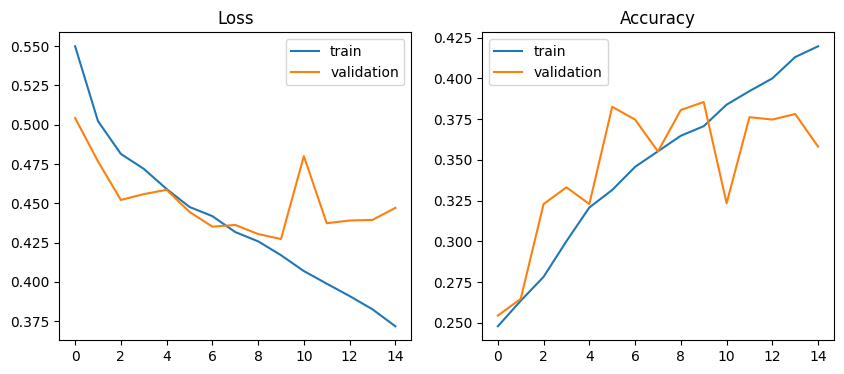

In [ ]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(np.arange(15), history.history['loss'], label = 'train')
plt.plot(np.arange(15), history.history['val_loss'], label = 'validation')
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(np.arange(15), history.history['accuracy'], label = 'train')
plt.plot(np.arange(15), history.history['val_accuracy'], label = 'validation')
plt.legend()

plt.show()

In [ ]:
model_path = '../models/model_densenet_3.h5'
model_3.save(model_path)

In this model we won't train any layer of a base model.

In [ ]:
base_model = DenseNet169(weights = 'imagenet',
                         include_top = False,
                         input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable = False

model_4 = Sequential([
  base_model,
  Dropout(0.5),
  GlobalAveragePooling2D(),
  Dropout(0.5),
  Dense(1024, activation = 'relu'),
  Dropout(0.5),
  Dense(128, activation = 'relu'),
  Dropout(0.5),
  Dense(num_classes, activation = 'sigmoid')
])

model_4.compile(optimizer = Adam(learning_rate = 0.0001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 2, 2, 1664)        12642880  
                                                                 
 dropout_8 (Dropout)         (None, 2, 2, 1664)        0         
                                                                 
 global_average_pooling2d_3  (None, 1664)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_9 (Dropout)         (None, 1664)              0         
                                                                 
 dense_9 (Dense)             (None, 1024)              1704960   
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                      

In [ ]:
history = model_4.fit(X_train,
                      y_train,
                      epochs = 15,
                      validation_data = (X_validation, y_validation),
                      batch_size = 32)

Epoch 1/15
256/256 [==============================] - 23s 50ms/step - loss: 0.7117 - accuracy: 0.2298 - val_loss: 0.5368 - val_accuracy: 0.2652
Epoch 2/15
256/256 [==============================] - 9s 36ms/step - loss: 0.5569 - accuracy: 0.2568 - val_loss: 0.5120 - val_accuracy: 0.2627
Epoch 3/15
256/256 [==============================] - 9s 35ms/step - loss: 0.5309 - accuracy: 0.2603 - val_loss: 0.5054 - val_accuracy: 0.2710
Epoch 4/15
256/256 [==============================] - 10s 39ms/step - loss: 0.5147 - accuracy: 0.2698 - val_loss: 0.4909 - val_accuracy: 0.2950
Epoch 5/15
256/256 [==============================] - 9s 37ms/step - loss: 0.5080 - accuracy: 0.2699 - val_loss: 0.4837 - val_accuracy: 0.2901
Epoch 6/15
256/256 [==============================] - 9s 36ms/step - loss: 0.4982 - accuracy: 0.2788 - val_loss: 0.4794 - val_accuracy: 0.3121
Epoch 7/15
256/256 [==============================] - 9s 35ms/step - loss: 0.4931 - accuracy: 0.2802 - val_loss: 0.4749 - val_accuracy: 0.30

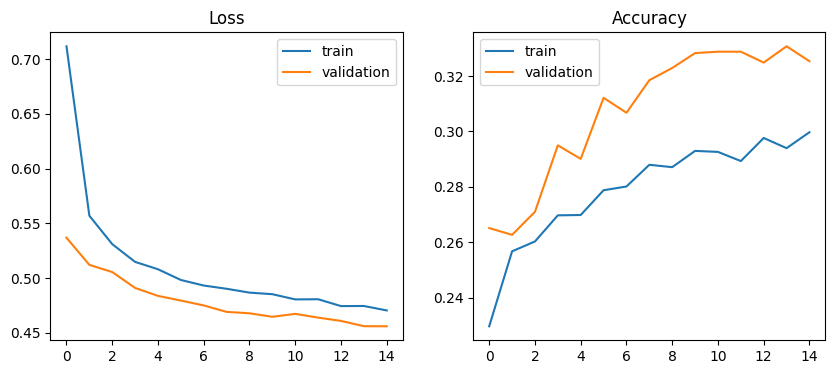

In [ ]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(np.arange(15), history.history['loss'], label = 'train')
plt.plot(np.arange(15), history.history['val_loss'], label = 'validation')
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(np.arange(15), history.history['accuracy'], label = 'train')
plt.plot(np.arange(15), history.history['val_accuracy'], label = 'validation')
plt.legend()

plt.show()

In [ ]:
model_path = '../models/model_densenet_4.h5'
model_4.save(model_path)

In the last model, we use 0.001 as the learning rate and do not train any layer of the base model.

In [ ]:
base_model = DenseNet169(weights = 'imagenet',
                         include_top = False,
                         input_shape = input_shape)

for layer in base_model.layers:
  layer.trainable = False

model_5 = Sequential([
  base_model,
  Dropout(0.5),
  GlobalAveragePooling2D(),
  Dropout(0.5),
  Dense(1024, activation = 'relu'),
  Dropout(0.5),
  Dense(128, activation = 'relu'),
  Dropout(0.5),
  Dense(num_classes, activation = 'sigmoid')
])

model_5.compile(optimizer = Adam(learning_rate = 0.001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 2, 2, 1664)        12642880  
                                                                 
 dropout_12 (Dropout)        (None, 2, 2, 1664)        0         
                                                                 
 global_average_pooling2d_4  (None, 1664)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_13 (Dropout)        (None, 1664)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              1704960   
                                                                 
 dropout_14 (Dropout)        (None, 1024)              0         
                                                      

In [ ]:
history = model_5.fit(X_train,
                      y_train,
                      epochs = 15,
                      validation_data = (X_validation, y_validation),
                      batch_size = 32)

Epoch 1/15
256/256 [==============================] - 25s 52ms/step - loss: 0.5547 - accuracy: 0.2645 - val_loss: 0.4694 - val_accuracy: 0.2896
Epoch 2/15
256/256 [==============================] - 10s 40ms/step - loss: 0.4966 - accuracy: 0.2767 - val_loss: 0.4697 - val_accuracy: 0.2886
Epoch 3/15
256/256 [==============================] - 9s 35ms/step - loss: 0.4819 - accuracy: 0.2910 - val_loss: 0.4582 - val_accuracy: 0.3209
Epoch 4/15
256/256 [==============================] - 10s 39ms/step - loss: 0.4719 - accuracy: 0.3007 - val_loss: 0.4490 - val_accuracy: 0.3141
Epoch 5/15
256/256 [==============================] - 10s 40ms/step - loss: 0.4701 - accuracy: 0.3016 - val_loss: 0.4515 - val_accuracy: 0.3058
Epoch 6/15
256/256 [==============================] - 9s 36ms/step - loss: 0.4630 - accuracy: 0.3105 - val_loss: 0.4482 - val_accuracy: 0.3043
Epoch 7/15
256/256 [==============================] - 10s 38ms/step - loss: 0.4613 - accuracy: 0.3073 - val_loss: 0.4441 - val_accuracy: 0

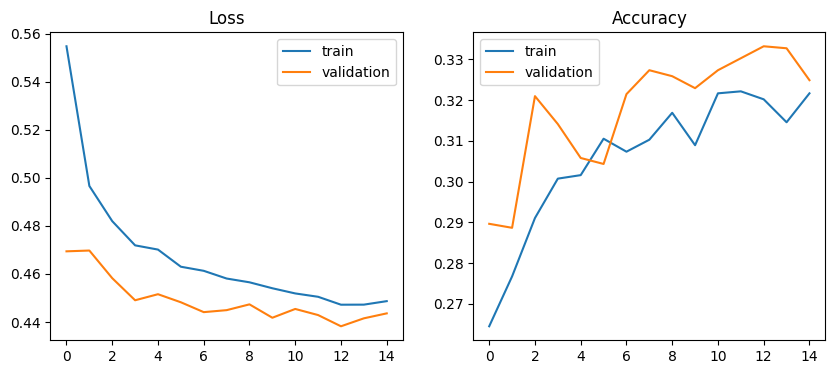

In [ ]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(np.arange(15), history.history['loss'], label = 'train')
plt.plot(np.arange(15), history.history['val_loss'], label = 'validation')
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(np.arange(15), history.history['accuracy'], label = 'train')
plt.plot(np.arange(15), history.history['val_accuracy'], label = 'validation')
plt.legend()

plt.show()

In [ ]:
model_path = '../models/model_densenet_5.h5'
model_5.save(model_path)

After looking at the plot with the accuracy and the loss, we will evaluate the last 3 models in the next notebook.